In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline


In [60]:
bikes = pd.read_csv('/Users/rupaliwadhawan/Downloads/bikes_sharing.csv')

In [61]:
bikes.head()

datetime  season  holiday  workingday  weather  temp   atemp   
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395  \
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [62]:
bikes.casual.unique()

array([  3,   8,   5,   0,   2,   1,  12,  26,  29,  47,  35,  40,  41,
        15,   9,   6,  11,   4,   7,  16,  20,  19,  10,  13,  14,  18,
        17,  21,  33,  23,  22,  28,  48,  52,  42,  24,  30,  27,  32,
        58,  62,  51,  25,  31,  59,  45,  73,  55,  68,  34,  38, 102,
        84,  39,  36,  43,  46,  60,  80,  83,  74,  37,  70,  81, 100,
        99,  54,  88,  97, 144, 149, 124,  98,  50,  72,  57,  71,  67,
        95,  90, 126, 174, 168, 170, 175, 138,  92,  56, 111,  89,  69,
       139, 166, 219, 240, 147, 148,  78,  53,  63,  79, 114,  94,  85,
       128,  93, 121, 156, 135, 103,  44,  49,  64,  91, 119, 167, 181,
       179, 161, 143,  75,  66, 109, 123, 113,  65,  86,  82, 132, 129,
       196, 142, 122, 106,  61, 107, 120, 195, 183, 206, 158, 137,  76,
       115, 150, 188, 193, 180, 127, 154, 108,  96, 110, 112, 169, 131,
       176, 134, 162, 153, 210, 118, 141, 146, 159, 178, 177, 136, 215,
       198, 248, 225, 194, 237, 242, 235, 224, 236, 222,  77,  8

In [63]:
bikes.casual.describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [64]:
def casual_category(x):
    if x>=0 and x<=4:
        return 0
    elif x>4 and x<=17:
        return 1
    elif x>17 and x<=49:
        return 2
    elif x>49:
        return 3

In [65]:
bikes['casual_cat']=bikes['casual'].apply(casual_category)

In [66]:
bikes.head()

datetime  season  holiday  workingday  weather  temp   atemp   
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395  \
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  casual_cat  
0        81        0.0       3          13     16           0  
1        80        0.0       8          32     40           1  
2        80        0.0       5          27     32           1  
3        75        0.0       3          10     13           0  
4        75        0.0       0           1      1           0

In [68]:
bikes

datetime  season  holiday  workingday  weather   temp   
0      2011-01-01 00:00:00       1        0           0        1   9.84  \
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  casual_cat  
0      14.395        81     0.0000       3          13     16           0  
1      13.635        80     0.0000       8          32     40           1  
2      13.635        80     0.0000       5          27     32           1  
3      14.395        75     0.0000       3          10     13           0  
4      14.395        75     0.0000       0           1      1           0  
...       ...       ...        ...     ...         ...    ...         ...  
10881  19.695        50    26.0027       7         329    336           1  
10882  17.425        57    15.0013      10         231    241           1  
10883  15.910        61    15.0013       4         164    168           0  
10884  17.425        61     6.0032      12         117    129           1  
10885  16.665        66     8.9981       4          84     88           0  

[10886 rows x 13 columns]

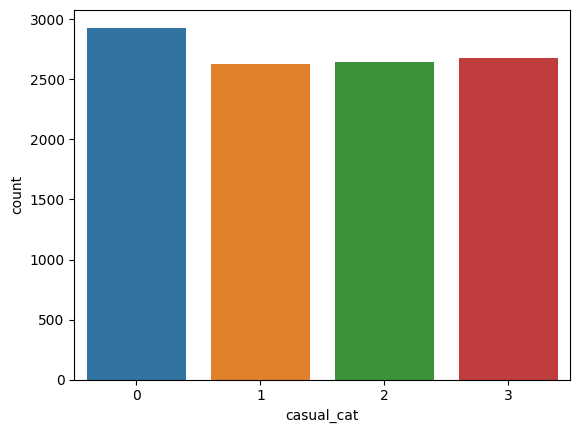

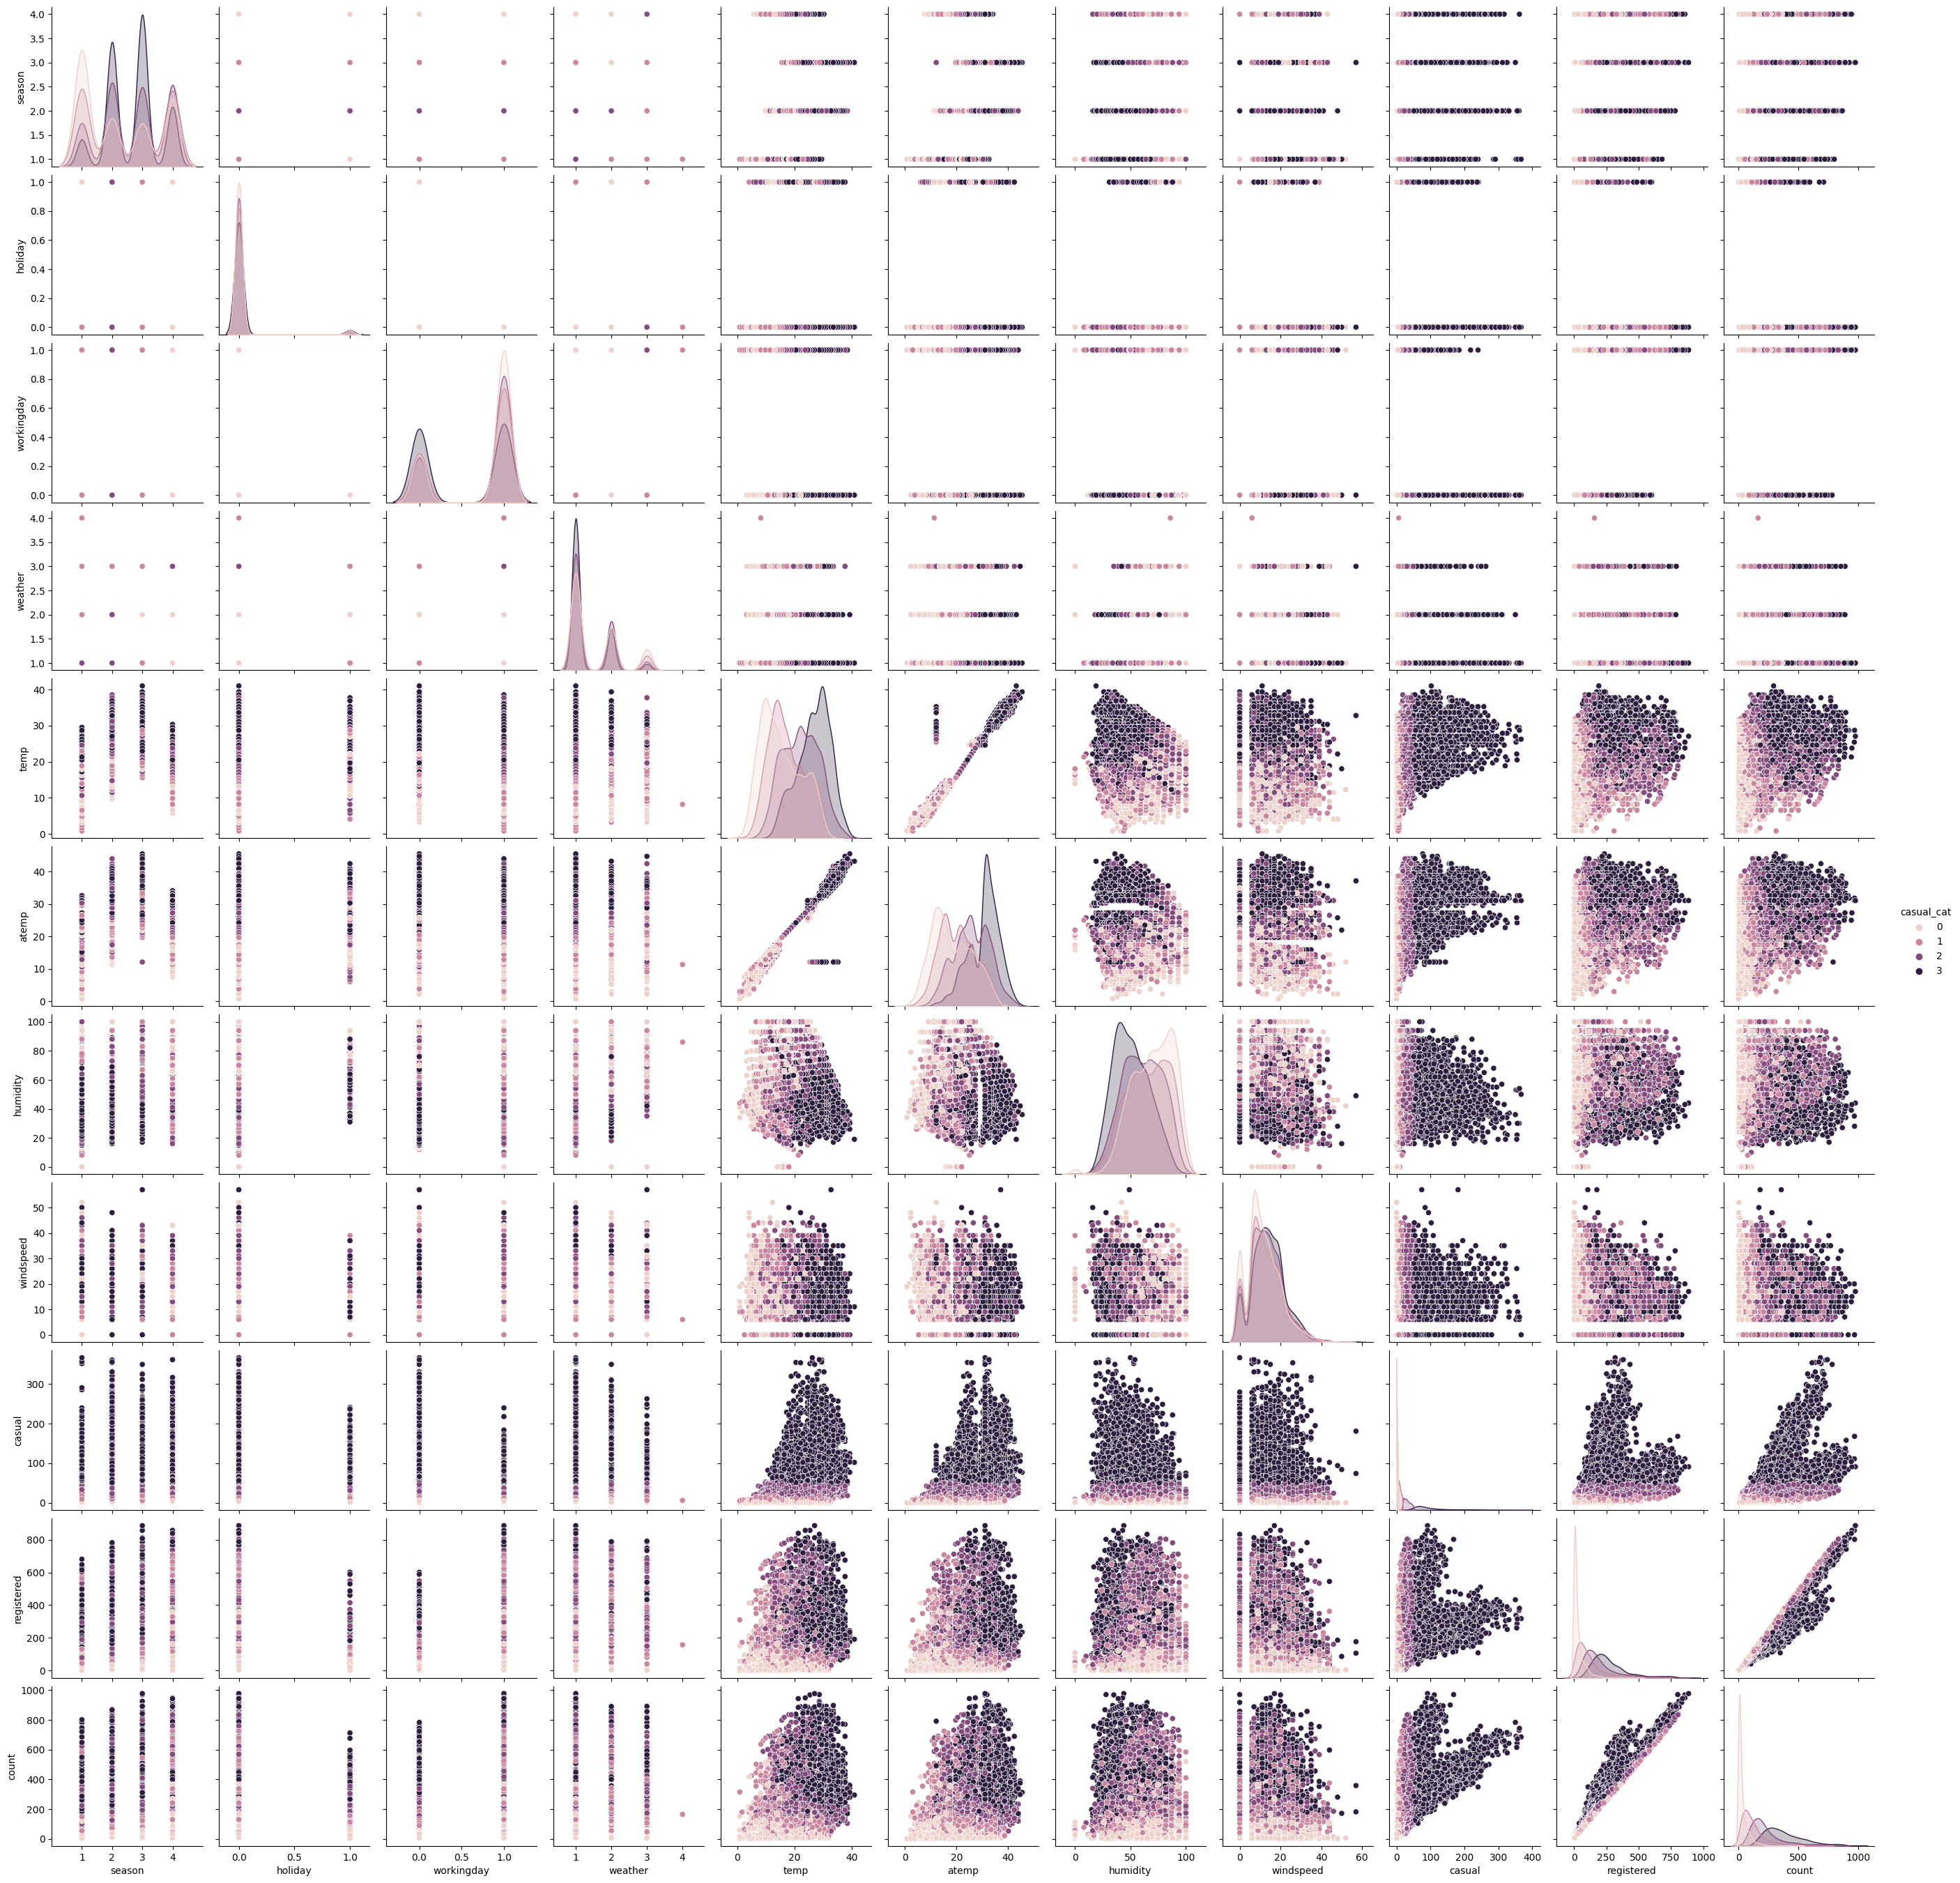

In [69]:
sns.countplot(x='casual_cat', data=bikes)
plt.show()

# More detailed exploration
sns.pairplot(bikes, hue='casual_cat')
plt.show()


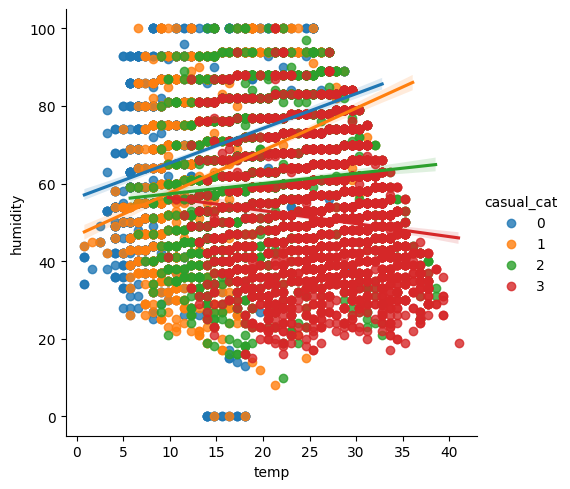

In [70]:
sns.lmplot(x='temp', y='humidity', hue = 'casual_cat', data=bikes)

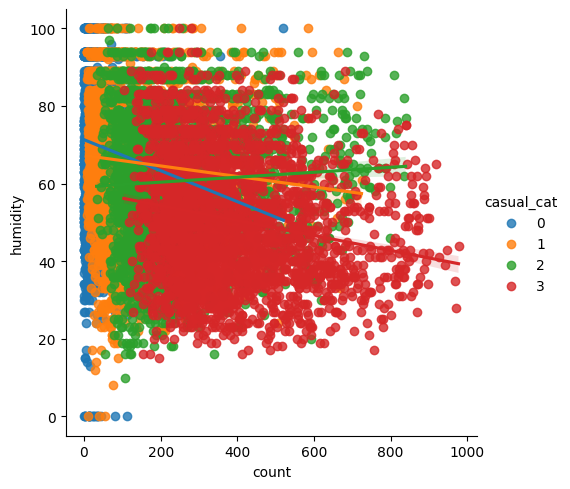

In [71]:
sns.lmplot(x='count', y='humidity', hue = 'casual_cat', data=bikes)

In [72]:
bikes.humidity.unique()

array([ 81,  80,  75,  86,  76,  77,  72,  82,  88,  87,  94, 100,  71,
        66,  57,  46,  42,  39,  44,  47,  50,  43,  40,  35,  30,  32,
        64,  69,  55,  59,  63,  68,  74,  51,  56,  52,  49,  48,  37,
        33,  28,  38,  36,  93,  29,  53,  34,  54,  41,  45,  92,  62,
        58,  61,  60,  65,  70,  27,  25,  26,  31,  73,  21,  24,  23,
        22,  19,  15,  67,  10,   8,  12,  14,  13,  17,  16,  18,  20,
        85,   0,  83,  84,  78,  79,  89,  97,  90,  96,  91])

In [73]:
bikes.temp.unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [74]:
bikes.weather.value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [75]:
bikes.index[bikes['weather'] == 4]

Index([5631], dtype='int64')

In [76]:
bikes.drop(5631,inplace=True)

In [77]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10885 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10885 non-null  object 
 1   season      10885 non-null  int64  
 2   holiday     10885 non-null  int64  
 3   workingday  10885 non-null  int64  
 4   weather     10885 non-null  int64  
 5   temp        10885 non-null  float64
 6   atemp       10885 non-null  float64
 7   humidity    10885 non-null  int64  
 8   windspeed   10885 non-null  float64
 9   casual      10885 non-null  int64  
 10  registered  10885 non-null  int64  
 11  count       10885 non-null  int64  
 12  casual_cat  10885 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.2+ MB


In [98]:
cat_columns = ['season','holiday','workingday','weather']
num_columns = ['temp','atemp','humidity','windspeed','count']
target = 'casual_cat'

In [99]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [100]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(bikes[cat_columns + num_columns], bikes[target], test_size=0.2, random_state=123)



In [101]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [102]:
x_train_transformed.shape

(8708, 16)

In [103]:
x_test_transformed.shape

(2177, 16)

In [104]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [122]:
accuracies = []

for a in range(1,100):
        
    knn = KNeighborsClassifier(n_neighbors = a)
    knn.fit(X_train_transformed, y_train)
    y_pred = knn.predict(X_test_transformed)
    # print(f1_score(y_pred, y_test))
    accuracies.append(accuracy_score(y_pred, y_test))

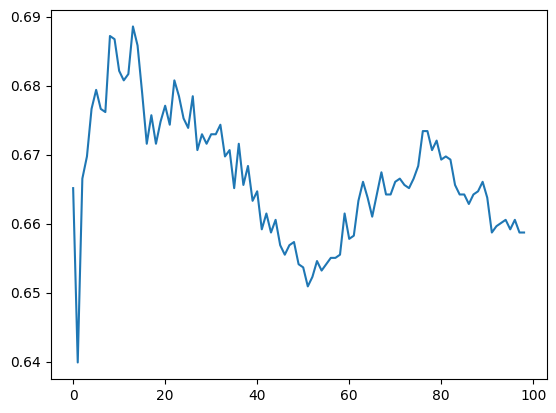

In [123]:
plt.plot(accuracies)

In [124]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train_transformed, y_train)
y_pred = knn.predict(X_test_transformed)
    # print(f1_score(y_pred, y_test))
accuracies.append(accuracy_score(y_pred, y_test))

In [125]:
# Hyperparameter tuning
# select parameters
#params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
params_knn = {'n_neighbors': list(range(1,500)), 'weights': ['uniform', 'distance'], 'metric':['euclidean','manhattan']}

# Define the models
#nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=100)

# Define GridSearchCV
#gridsearch_nb = GridSearchCV(knn, params_knn, cv=5, scoring='accuracy')
    #nb, params_nb, cv=5)
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter=100, scoring='accuracy')

# Fit models
#gridsearch_nb.fit(X_train_transformed, y_train)
randomsearch_knn.fit(X_train_transformed, y_train)

# Get the best parameters
#print("Best parameters for Naive Bayes: ", gridsearch_nb.best_params_)
print("Best parameters for KNN: ", randomsearch_knn.best_params_)

Best parameters for KNN:  {'weights': 'distance', 'n_neighbors': 26, 'metric': 'manhattan'}


In [126]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)

# Perform cross-validation
#cv_scores_nb = cross_val_score(nb_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
cv_scores_knn = cross_val_score(knn_best, X_train_transformed, y_train, cv=5, scoring='accuracy')

#print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)

# Fit the models with the best parameters
#nb_best.fit(X_train_transformed, y_train)
knn_best.fit(X_train_transformed, y_train)

# Evaluate on the test set
#y_pred_nb = nb_best.predict(X_test_transformed)
y_pred_knn = knn_best.predict(X_test_transformed)

#print("Test accuracy for Naive Bayes: ", accuracy_score(y_test, y_pred_nb))
print("Test accuracy for KNN: ", accuracy_score(y_test, y_pred_knn))

Cross-validation scores for KNN:  [0.68082664 0.68714122 0.69747417 0.66858128 0.70017231]
Test accuracy for KNN:  0.6986678915939366


In [128]:
print("K-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))


K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[473  80   4   1]
 [184 274  69   4]
 [ 13 139 339  75]
 [  1   6  80 435]]
Accuracy:  0.6986678915939366
